# Transformação de Variáveis (parte 2)
### Introdução
Neste notebook, vamos demonstrar duas técnicas comuns de transformação de variáveis: **One-Hot Encoding** e **Binning**. Estas técnicas são particularmente úteis quando lidamos com variáveis categóricas ou desejamos agrupar variáveis contínuas em categorias discretas.

No pré-processamento de dados para Machine Learning, é comum precisarmos transformar variáveis de modo que elas se tornem adequadas para os algoritmos que vamos utilizar. Muitos modelos de Machine Learning não conseguem trabalhar com dados categóricos diretamente, sendo necessário convertê-los em uma forma numérica. Além disso, alguns modelos, como Naive Bayes e Regressão Logística, são conhecidos por terem melhor desempenho com variáveis categóricas adequadamente transformadas.

**One-Hot Encoding** é uma técnica usada para transformar variáveis categóricas em colunas binárias, cada uma representando uma categoria única. Isso é útil, por exemplo, quando temos um modelo que não consegue lidar diretamente com variáveis categóricas, como redes neurais ou regressões lineares. One-Hot Encoding é bastante utilizado em **modelos de classificação**, **análise de sentimento** e **sistemas de recomendação**, onde variáveis categóricas, como tipos de produtos ou palavras, precisam ser transformadas.

**Binning** é uma técnica que converte variáveis contínuas em categorias discretas. Isso é útil quando se deseja agrupar dados contínuos em intervalos ou faixas específicas, o que pode facilitar a interpretação dos resultados e melhorar a eficiência de certos algoritmos. Alguns algoritmos de Machine Learning, como **Decision Trees** e **Naive Bayes**, podem ser otimizados quando trabalham com entradas categóricas, tornando o binning uma etapa importante de pré-processamento.

### Objectivos
Os principais objetivos deste notebook são:
1. Demonstrar como utilizar **One-Hot Encoding** para transformar variáveis categóricas em variáveis numéricas, adequando-as aos requisitos dos modelos de Machine Learning.
2. Aplicar a técnica de **Binning** para categorizar variáveis contínuas, facilitando a interpretação dos dados e a construção de modelos que lidem melhor com dados discretizados.

### Importação das Bibliotecas Necessárias
Nesta seção, importamos as bibliotecas essenciais para a análise de dados e visualização

Se ainda não tiver instalado as bibliotecas abaixo, remova o `#` e execute a célula abaixo para instalar antes de continuar.

In [33]:
# !pip install  pandas matplotlib seaborn

In [6]:
# Carregar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## One-Hot Encoding

Vamos criar um conjunto de dados fictício contendo apenas variáveis categóricas para demonstrar a técnica de One-Hot Encoding.

In [8]:
# Criar um conjunto de dados fictício apenas com variáveis categóricas
data_categ = {
    'cor': ['Vermelho', 'Azul', 'Verde', 'Amarelo', 'Azul', 'Verde', 'Vermelho', 'Amarelo', 'Azul', 'Verde'],
    'tipo': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C']
}
df_categ = pd.DataFrame(data_categ)
print(df_categ)

        cor tipo
0  Vermelho    A
1      Azul    B
2     Verde    A
3   Amarelo    C
4      Azul    B
5     Verde    A
6  Vermelho    C
7   Amarelo    B
8      Azul    A
9     Verde    C


#### Aplicar One-Hot Encoding
Nesta etapa, vamos converter as variáveis categóricas ('cor' e 'tipo') em múltiplas colunas binárias, cada uma representando uma das categorias possíveis.

In [11]:
# Aplicar One-Hot Encoding na variável categórica
one_hot_encoded_df = pd.get_dummies(df_categ, columns=['cor', 'tipo'])
print(one_hot_encoded_df)

   cor_Amarelo  cor_Azul  cor_Verde  cor_Vermelho  tipo_A  tipo_B  tipo_C
0        False     False      False          True    True   False   False
1        False      True      False         False   False    True   False
2        False     False       True         False    True   False   False
3         True     False      False         False   False   False    True
4        False      True      False         False   False    True   False
5        False     False       True         False    True   False   False
6        False     False      False          True   False   False    True
7         True     False      False         False   False    True   False
8        False      True      False         False    True   False   False
9        False     False       True         False   False   False    True


#### Visualizar One-Hot Encoding
Vamos plotar as colunas resultantes do One-Hot Encoding para ver a representação binária das categorias.

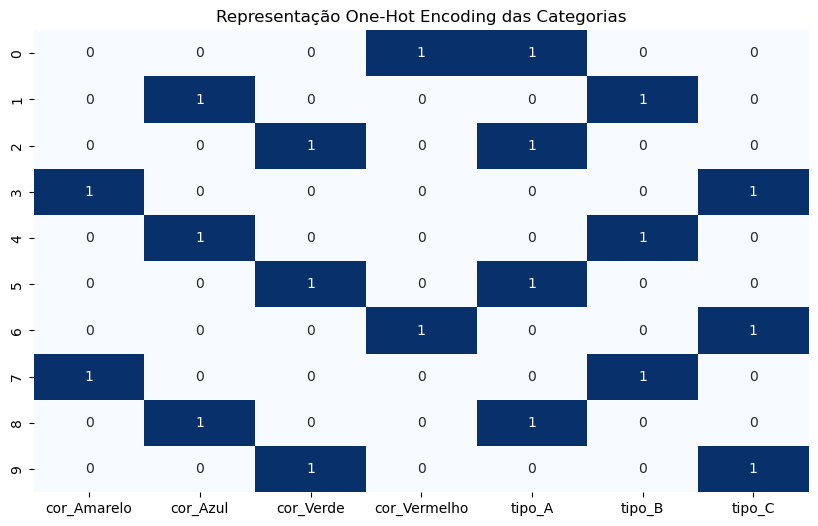

In [14]:
# Fazer o gráfico do resultado do One-Hot Encoding
plt.figure(figsize=(10, 6))
sns.heatmap(one_hot_encoded_df.iloc[:, :], annot=True, cmap='Blues', cbar=False)
plt.title('Representação One-Hot Encoding das Categorias')
plt.show()

**Resultado:**
A variável 'cor' e 'tipo' foram expandidas em colunas binárias, permitindo que os modelos matemáticos trabalhem com essas informações de forma eficiente.

## Binning

Para ilustrar a técnica de binning, vamos criar um conjunto de dados fictício que contém variáveis contínuas e categóricas.


In [18]:
# Dataset de exemplo com variáveis categóricas e contínuas
data = {
    'categoria': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'idade': [23, 45, 31, 35, 52, 27, 40, 29, 50, 33],
    'renda': [20000, 50000, 27000, 32000, 47000, 22000, 41000, 25000, 49000, 30000]
}
df = pd.DataFrame(data)
print(df)

  categoria  idade  renda
0         A     23  20000
1         B     45  50000
2         A     31  27000
3         C     35  32000
4         B     52  47000
5         A     27  22000
6         C     40  41000
7         B     29  25000
8         A     50  49000
9         C     33  30000


#### Aplicar Binning
Vamos dividir a variável 'idade' em categorias discretas (faixas etárias).

In [21]:
# Criar faixas etárias para a variável 'idade'
faixas_etarias = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
df['faixa_etaria'] = pd.cut(df['idade'], bins=faixas_etarias, labels=labels)
print(df)

  categoria  idade  renda faixa_etaria
0         A     23  20000        20-30
1         B     45  50000        40-50
2         A     31  27000        30-40
3         C     35  32000        30-40
4         B     52  47000        50-60
5         A     27  22000        20-30
6         C     40  41000        30-40
7         B     29  25000        20-30
8         A     50  49000        40-50
9         C     33  30000        30-40


#### Visualizar Binning
Podemos comparar a distribuição da variável 'idade' antes e depois do binning, criando plots que mostram as faixas etárias.

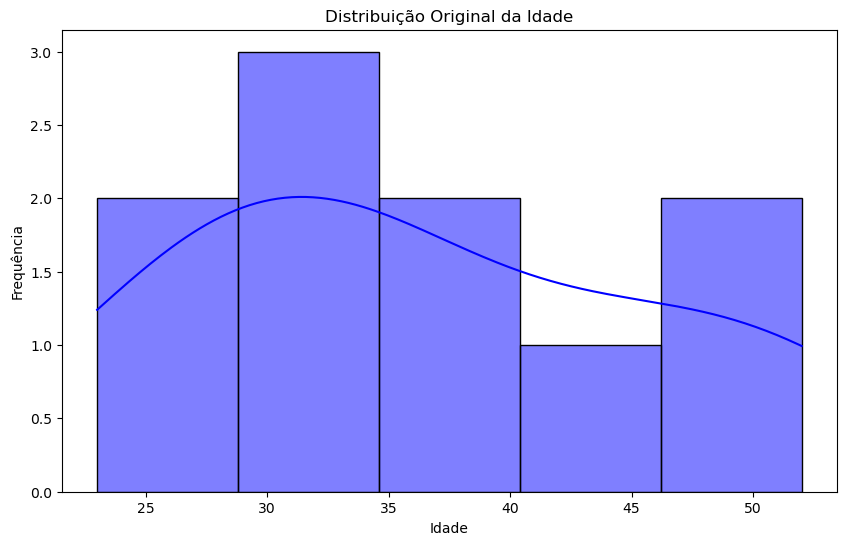

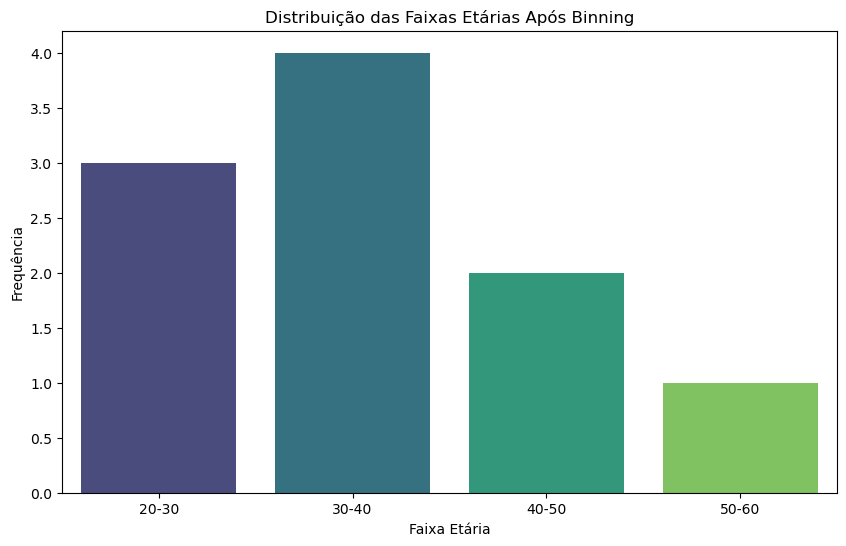

In [24]:
# Fazer o gráfico da distribuição da idade original
plt.figure(figsize=(10, 6))
sns.histplot(df['idade'], kde=True, color='blue')
plt.title('Distribuição Original da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Fazer o gráfico da distribuição das faixas etárias após o binning
plt.figure(figsize=(10, 6))
sns.countplot(x='faixa_etaria', data=df, hue='faixa_etaria', palette='viridis', legend=False)
plt.title('Distribuição das Faixas Etárias Após Binning')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.show()

**Resultado:**
A variável 'idade' foi dividida em faixas etárias, o que pode ajudar na análise de tendências e na criação de grupos para modelos que beneficiam da agregação de dados contínuos em categorias discretas.

### Conclusão
Neste notebook, demonstrámos como aplicar **One-Hot Encoding** e **Binning** para transformar variáveis de um conjunto de dados. Além disso, visualizámos o impacto dessas técnicas nas variáveis, utilizando gráficos para compreender melhor as mudanças. Essas técnicas são essenciais para preparar variáveis categóricas e contínuas de uma maneira que modelos de Machine Learning possam utilizá-las de forma eficaz.

Enquanto o One-Hot Encoding é particularmente útil para converter variáveis categóricas em representações numéricas para modelos que não aceitam diretamente categorias, o Binning é uma ótima ferramenta para criar categorias a partir de variáveis contínuas, o que facilita a interpretação e a análise de padrões.

### Nota
Todos os dados utilizados neste notebook são puramente para **fins de demonstração**.

### Este notebook foi escrito por Simão Rafique

Pode seguir-me no [LinkedIn](https://www.linkedin.com/in/simão-rafique).